In [1]:
import pandas as pd
import numpy as np
import string
import re

In [2]:
df_reviews = pd.read_csv('final_restaurant_review_data.csv', lineterminator='\n')

#### Converting full_review column to str for pre-processing

In [3]:
df_reviews['full_review'] = df_reviews['full_review'].astype(str)

### Text Pre-processing

#### Punctuation removal
##### All the punctuations from the text are removed. string library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
# function to remove punctuation
def remove_punctuation(review):
    review_without_punctuation = "".join([i for i in review if i not in string.punctuation])
    return review_without_punctuation

df_reviews['cleaned_review'] = df_reviews['full_review'].apply(lambda x: remove_punctuation(x))

#### Removing numbers as they do not hold information

In [6]:
df_reviews['cleaned_review'].replace('\d', '', regex=True, inplace=True)

#### Removing emojis as they do not hold information

In [7]:
def remove_emojis(review):
    return review.encode('ascii', 'ignore').decode('ascii')
df_reviews['cleaned_review'] = df_reviews['cleaned_review'].apply(lambda x: remove_emojis(x))

#### Removing nltk english stopwords

In [8]:
# import nltk library
import nltk
nltk.download('stopwords')
# import stopwords fron nltk
from nltk.corpus import stopwords
stop_words = [sw for sw in stopwords.words('english') if sw not in ['not', 'no']]

# function to remove nltk english stopwords 
def remove_stopwords(review):
    review_words = review.split()
    noise_free_words = [word for word in review_words if word not in stop_words]
    noise_free_review = " ".join(noise_free_words)
    return noise_free_review

df_reviews['cleaned_sw_review'] = df_reviews['cleaned_review'].apply(lambda x: remove_stopwords(x))
df_reviews[['cleaned_review', 'cleaned_sw_review']]

[nltk_data] Downloading package stopwords to /Users/dylan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_review,cleaned_sw_review
0,Actually ordered online with Deliveroo disappo...,Actually ordered online Deliveroo disappointin...
1,Hate to write bad reviews but Bad service bad ...,Hate write bad reviews Bad service bad attitud...
2,Tempting pizzas I went with a couple a family ...,Tempting pizzas I went couple family friend pa...
3,Quick lunch pizza Great pizza Easy to order an...,Quick lunch pizza Great pizza Easy order deliv...
4,Nice italian thin crust pizzas Good for casual...,Nice italian thin crust pizzas Good casual din...
...,...,...
400936,Poor service and food is below average Wanted ...,Poor service food average Wanted try indian cu...
400937,Questionable Service Very poor service indeed ...,Questionable Service Very poor service indeed ...
400938,Terrible Experience Waited for hours for my f...,Terrible Experience Waited hours food delivery...
400939,Not worth it Order via deliveroo Will be my fi...,Not worth Order via deliveroo Will first last ...


#### Stemming

In [9]:
# string split for Stemming
df_reviews['cleaned_stem_review'] = df_reviews['cleaned_sw_review'].apply(lambda x: x.split())

#importing the Stemming function from nltk library
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer(language='english')

# function for snowball stemming
def snowball_stemming(review):
    stem_review = [snowball_stemmer.stem(word) for word in review]
    return stem_review

df_reviews['cleaned_stem_review'] = df_reviews['cleaned_stem_review'].apply(lambda x: snowball_stemming(x))
df_reviews[['cleaned_review', 'cleaned_sw_review', 'cleaned_stem_review']]

,cleaned_review,cleaned_sw_review,cleaned_stem_review
0,Actually ordered online with Deliveroo disappo...,Actually ordered online Deliveroo disappointin...,"[actual, order, onlin, deliveroo, disappoint, ..."
1,Hate to write bad reviews but Bad service bad ...,Hate write bad reviews Bad service bad attitud...,"[hate, write, bad, review, bad, servic, bad, a..."
2,Tempting pizzas I went with a couple a family ...,Tempting pizzas I went couple family friend pa...,"[tempt, pizza, i, went, coupl, famili, friend,..."
3,Quick lunch pizza Great pizza Easy to order an...,Quick lunch pizza Great pizza Easy order deliv...,"[quick, lunch, pizza, great, pizza, easi, orde..."
4,Nice italian thin crust pizzas Good for casual...,Nice italian thin crust pizzas Good casual din...,"[nice, italian, thin, crust, pizza, good, casu..."
...,...,...,...
400936,Poor service and food is below average Wanted ...,Poor service food average Wanted try indian cu...,"[poor, servic, food, averag, want, tri, indian..."
400937,Questionable Service Very poor service indeed ...,Questionable Service Very poor service indeed ...,"[question, servic, veri, poor, servic, inde, w..."
400938,Terrible Experience Waited for hours for my f...,Terrible Experience Waited hours food delivery...,"[terribl, experi, wait, hour, food, deliveri, ..."
400939,Not worth it Order via deliveroo Will be my fi...,Not worth Order via deliveroo Will first last ...,"[not, worth, order, via, deliveroo, will, firs..."


#### Lemmatization

In [10]:
# importing WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# string split for Stemming
df_reviews['cleaned_lem_review'] = df_reviews['cleaned_sw_review'].apply(lambda x: x.split())

#defining the function for lemmatization
def lemmatizer(review):
    lemm_review = [wordnet_lemmatizer.lemmatize(word) for word in review]
    return lemm_review

df_reviews['cleaned_lem_review'] = df_reviews['cleaned_lem_review'].apply(lambda x: lemmatizer(x))
df_reviews[['cleaned_sw_review', 'cleaned_stem_review', 'cleaned_lem_review']]


[nltk_data] Downloading package wordnet to /Users/dylan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,cleaned_sw_review,cleaned_stem_review,cleaned_lem_review
0,Actually ordered online Deliveroo disappointin...,"[actual, order, onlin, deliveroo, disappoint, ...","[Actually, ordered, online, Deliveroo, disappo..."
1,Hate write bad reviews Bad service bad attitud...,"[hate, write, bad, review, bad, servic, bad, a...","[Hate, write, bad, review, Bad, service, bad, ..."
2,Tempting pizzas I went couple family friend pa...,"[tempt, pizza, i, went, coupl, famili, friend,...","[Tempting, pizza, I, went, couple, family, fri..."
3,Quick lunch pizza Great pizza Easy order deliv...,"[quick, lunch, pizza, great, pizza, easi, orde...","[Quick, lunch, pizza, Great, pizza, Easy, orde..."
4,Nice italian thin crust pizzas Good casual din...,"[nice, italian, thin, crust, pizza, good, casu...","[Nice, italian, thin, crust, pizza, Good, casu..."
...,...,...,...
400936,Poor service food average Wanted try indian cu...,"[poor, servic, food, averag, want, tri, indian...","[Poor, service, food, average, Wanted, try, in..."
400937,Questionable Service Very poor service indeed ...,"[question, servic, veri, poor, servic, inde, w...","[Questionable, Service, Very, poor, service, i..."
400938,Terrible Experience Waited hours food delivery...,"[terribl, experi, wait, hour, food, deliveri, ...","[Terrible, Experience, Waited, hour, food, del..."
400939,Not worth Order via deliveroo Will first last ...,"[not, worth, order, via, deliveroo, will, firs...","[Not, worth, Order, via, deliveroo, Will, firs..."


#### a) 
#### Naive Bayes Model, using CountVectorizer and TFIDVectorizer
#### Model Training & Prediction on cleaned_review  

In [11]:
df_reviews = df_reviews[df_reviews['review_sentiment_category'].notna()]
df_reviews['review_sentiment_category'].astype(int)
df_reviews['rating'].isnull().values.any()

False

In [12]:
# define X and y
X = df_reviews['cleaned_review']
y = df_reviews['review_sentiment_category']

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# define a function that accepts a vectorizer and calculates the accuracy
def nb_tokenize_test(vect, X_train, y_train, X_test, y_test):
    
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # use Multinomial Naive Bayes to predict the review_sentiment_category
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    predictions = nb.predict(X_test_dtm)
    
    # print the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))

    # print the accuracy of its predictions
    print('Accuracy: ', metrics.accuracy_score(y_test, predictions))

    # print the precision of the model
    print('Precision: ', precision_score(y_test, predictions, average="weighted"))

    # print the recall of the model
    print('Recall: ', recall_score(y_test, predictions, average="weighted"))

    # print confusion matrix
    print('Confusion Matrix: ', confusion_matrix(y_test, predictions))

    # print AUC
    print('AUC: ', metrics.roc_auc_score(y_test, predictions))

In [14]:
countvect = CountVectorizer()
nb_tokenize_test(countvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.8949125804359754
Accuracy:  0.887427046440864
Precision:  0.8845227665757122
Recall:  0.887427046440864
Confusion Matrix:  [[ 6796  4892]
 [ 4135 64365]]
AUC:  0.7605430487067653


In [15]:
tfidvect = TfidfVectorizer()
nb_tokenize_test(tfidvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.8571357310320746
Accuracy:  0.8548910061355813
Precision:  0.8662743849876113
Recall:  0.8548910061355813
Confusion Matrix:  [[   56 11632]
 [    4 68496]]
AUC:  0.5023664223584486


#### Naive Bayes Model, using CountVectorizer and TFIDVectorizer
#### Model Training & Prediction on cleaned_sw_review (cleaned reviews that have stop words removed)  

In [16]:
# define X and y
X = df_reviews['cleaned_sw_review']
y = df_reviews['review_sentiment_category']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

In [17]:
countvect = CountVectorizer()
nb_tokenize_test(countvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.8970762458223176
Accuracy:  0.8896468299496184
Precision:  0.8857684984197629
Recall:  0.8896468299496184
Confusion Matrix:  [[ 6737  4951]
 [ 3898 64602]]
AUC:  0.759749019519677


In [18]:
tfidvect = TfidfVectorizer()
nb_tokenize_test(tfidvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.8589907467451489
Accuracy:  0.8556018356861376
Precision:  0.8662200357219307
Recall:  0.8556018356861376
Confusion Matrix:  [[  118 11570]
 [    9 68491]]
AUC:  0.5049822189581179


#### Naive Bayes Model, using CountVectorizer and TFIDVectorizer
#### Model Training & Prediction on cleaned_stem_review (cleaned reviews that have stop words removed and stemmatized)  

In [19]:
# define X and y
X = df_reviews['cleaned_stem_review'].apply(lambda x: ' '.join(x) )
y = df_reviews['review_sentiment_category']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

In [20]:
countvect = CountVectorizer()
nb_tokenize_test(countvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.8952492891704494
Accuracy:  0.8889734124806704
Precision:  0.8852547891967806
Recall:  0.8889734124806704
Confusion Matrix:  [[ 6737  4951]
 [ 3952 64548]]
AUC:  0.7593548589357354


In [21]:
tfidvect = TfidfVectorizer()
nb_tokenize_test(tfidvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.8587413328677608
Accuracy:  0.8554771287474435
Precision:  0.8642170933226381
Recall:  0.8554771287474435
Confusion Matrix:  [[  109 11579]
 [   10 68490]]
AUC:  0.5045899094211045


#### Naive Bayes Model, using CountVectorizer and TFIDVectorizer
#### Model Training & Prediction on cleaned_lem_review (cleaned reviews that have stop words removed and lemmatized)  

In [22]:
# define X and y
X = df_reviews['cleaned_lem_review'].apply(lambda x: ' '.join(x) )
y = df_reviews['review_sentiment_category']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

In [23]:
countvect = CountVectorizer()
nb_tokenize_test(countvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.8972820122711628
Accuracy:  0.8899585972963535
Precision:  0.8860147328118709
Recall:  0.8899585972963535
Confusion Matrix:  [[ 6738  4950]
 [ 3874 64626]]
AUC:  0.7599669809199778


In [24]:
tfidvect = TfidfVectorizer()
nb_tokenize_test(tfidvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.8590437471940939
Accuracy:  0.8556641891554846
Precision:  0.8686086617180951
Recall:  0.8556641891554846
Confusion Matrix:  [[  121 11567]
 [    7 68493]]
AUC:  0.5051251542539107


#### Naive Bayes Model, using CountVectorizer and TFIDVectorizer
#### Model Training & Prediction on cleaned_review with ngram tuning

In [25]:
# define X and y
X = df_reviews['cleaned_review']
y = df_reviews['review_sentiment_category']

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

In [26]:
# include 1-grams and 2-grams (include unigram and bi-gram)
countvect = CountVectorizer(ngram_range=(1, 2))
nb_tokenize_test(countvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.9335093779617898
Accuracy:  0.8920162617848058
Precision:  0.8820716260318907
Recall:  0.8920162617848058
Confusion Matrix:  [[ 4319  7369]
 [ 1290 67210]]
AUC:  0.6753460908187072


In [27]:
# include 1-grams and 2-grams (include unigram and bi-gram)
tfidvect = TfidfVectorizer(ngram_range=(1,2))
nb_tokenize_test(tfidvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.8543485309522622
Accuracy:  0.854267471442111
Precision:  0.8755059710396406
Recall:  0.854267471442111
Confusion Matrix:  [[    2 11686]
 [    0 68500]]
AUC:  0.500085557837098


#### Naive Bayes Model, using CountVectorizer and TFIDVectorizer
#### Model Training & Prediction on cleaned_review ignoring terms that appear in more than 50% of the document

In [28]:
# define X and y
X = df_reviews['cleaned_review']
y = df_reviews['review_sentiment_category']

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

In [29]:
# ignoring terms that appear in more than 50% of the document
countvect = CountVectorizer(max_df=0.5)
nb_tokenize_test(countvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.8960505312515589
Accuracy:  0.8881129346036813
Precision:  0.884971067128709
Recall:  0.8881129346036813
Confusion Matrix:  [[ 6788  4900]
 [ 4072 64428]]
AUC:  0.7606606713729723


In [30]:
# ignoring terms that appear in more than 50% of the document
tfidvect = TfidfVectorizer(max_df=0.5)
nb_tokenize_test(tfidvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.8576595001745897
Accuracy:  0.8551154786252307
Precision:  0.8670533565415227
Recall:  0.8551154786252307
Confusion Matrix:  [[   75 11613]
 [    5 68495]]
AUC:  0.5031719225408054


#### b) 
#### Logistic Regression, using CountVectorizer and TFIDVectorizer
#### Model Training & Prediction on cleaned_review 

In [31]:
# define X and y
X = df_reviews['cleaned_review']
y = df_reviews['review_sentiment_category']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# define a function that accepts a vectorizer and calculates the accuracy
def lr_tokenize_test(vect, X_train, y_train, X_test, y_test):
    
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # use Multinomial Naive Bayes to predict the review_sentiment_category
    lr = LogisticRegression(max_iter=3000)
    lr.fit(X_train_dtm, y_train)
    predictions = lr.predict(X_test_dtm)
    
    # print the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, lr.predict(X_train_dtm)))

    # print the accuracy of its predictions
    print('Accuracy: ', metrics.accuracy_score(y_test, predictions))

    # print the precision of the model
    print('Precision: ', precision_score(y_test, predictions, average="weighted"))

    # print the recall of the model
    print('Recall: ', recall_score(y_test, predictions, average="weighted"))

    # print confusion matrix
    print('Confusion Matrix: ', confusion_matrix(y_test, predictions))

    # print AUC
    print('AUC: ', metrics.roc_auc_score(y_test, predictions))


In [33]:
countvect = CountVectorizer()
lr_tokenize_test(countvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.9654873547164164
Accuracy:  0.9350526263281289
Precision:  0.9331026114692008
Recall:  0.9350526263281289
Confusion Matrix:  [[ 8566  3122]
 [ 2086 66414]]
AUC:  0.8512179389179494


In [34]:
tfidvect = TfidfVectorizer()
lr_tokenize_test(tfidvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.9452723599541079
Accuracy:  0.9342046191450092
Precision:  0.9312205653307022
Recall:  0.9342046191450092
Confusion Matrix:  [[ 7976  3712]
 [ 1564 66936]]
AUC:  0.8297885959521775


#### Logistic Regression, using CountVectorizer and TFIDVectorizer
#### Model Training & Prediction on cleaned_sw_review (cleaned reviews that have stop words removed)  

In [35]:
# define X and y
X = df_reviews['cleaned_sw_review']
y = df_reviews['review_sentiment_category']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

In [36]:
countvect = CountVectorizer()
lr_tokenize_test(countvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.9623540928817279
Accuracy:  0.9305132937596647
Precision:  0.9281539749735616
Recall:  0.9305132937596647
Confusion Matrix:  [[ 8313  3375]
 [ 2197 66303]]
AUC:  0.8395846535469657


In [37]:
tfidvect = TfidfVectorizer()
lr_tokenize_test(tfidvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.9421827455479623
Accuracy:  0.9306504713922282
Precision:  0.9272723616040345
Recall:  0.9306504713922282
Confusion Matrix:  [[ 7775  3913]
 [ 1648 66852]]
AUC:  0.8205768946377094


#### Logistic Regression, using CountVectorizer and TFIDVectorizer
#### Model Training & Prediction on cleaned_stem_review (cleaned reviews that have stop words removed and stemmatized)  

In [38]:
# define X and y
X = df_reviews['cleaned_stem_review'].apply(lambda x: ' '.join(x) )
y = df_reviews['review_sentiment_category']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

In [39]:
countvect = CountVectorizer()
lr_tokenize_test(countvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.954856088192747
Accuracy:  0.9271711478026637
Precision:  0.9242563054447539
Recall:  0.9271711478026637
Confusion Matrix:  [[ 8050  3638]
 [ 2202 66298]]
AUC:  0.8282973016182296


In [40]:
tfidvect = TfidfVectorizer()
lr_tokenize_test(tfidvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.9383760662443258
Accuracy:  0.9279692722103058
Precision:  0.9243064312194134
Recall:  0.9279692722103058
Confusion Matrix:  [[ 7662  4026]
 [ 1750 66750]]
AUC:  0.814998351294234


#### Logistic Regression, using CountVectorizer and TFIDVectorizer
#### Model Training & Prediction on cleaned_lem_review (cleaned reviews that have stop words removed and lemmatized)  

In [41]:
# define X and y
X = df_reviews['cleaned_lem_review'].apply(lambda x: ' '.join(x) )
y = df_reviews['review_sentiment_category']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

In [42]:
countvect = CountVectorizer()
lr_tokenize_test(countvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.9614156731680551
Accuracy:  0.9304384695964484
Precision:  0.9279725665202667
Recall:  0.9304384695964484
Confusion Matrix:  [[ 8275  3413]
 [ 2165 66335]]
AUC:  0.8381926312844419


In [43]:
tfidvect = TfidfVectorizer()
lr_tokenize_test(tfidvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.9419021549359007
Accuracy:  0.9302389384945379
Precision:  0.9268205301843858
Recall:  0.9302389384945379
Confusion Matrix:  [[ 7762  3926]
 [ 1668 66832]]
AUC:  0.8198747832951134


#### Logistic Regression, using CountVectorizer and TFIDVectorizer
#### Model Training & Prediction on cleaned_review with ngram tuning

In [44]:
# define X and y
X = df_reviews['cleaned_review']
y = df_reviews['review_sentiment_category']

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

In [45]:
countvect = CountVectorizer(ngram_range=(1,2))
lr_tokenize_test(countvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.9997630568164813
Accuracy:  0.9432084601187211
Precision:  0.9418558454479422
Recall:  0.9432084601187211
Confusion Matrix:  [[ 9004  2684]
 [ 1870 66630]]
AUC:  0.8715317475781512


In [46]:
tfidvect = TfidfVectorizer(ngram_range=(1,2))
lr_tokenize_test(tfidvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.9548404998254103
Accuracy:  0.9330199032274156
Precision:  0.9302713132063961
Recall:  0.9330199032274156
Confusion Matrix:  [[ 7416  4272]
 [ 1099 67401]]
AUC:  0.8092265621487132


#### Logistic Regression, using CountVectorizer and TFIDVectorizer
#### Model Training & Prediction on cleaned_review ignoring terms that appear in more than 50% of the document

In [47]:
# define X and y
X = df_reviews['cleaned_review']
y = df_reviews['review_sentiment_category']

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

In [48]:
countvect = CountVectorizer(max_df=0.5)
lr_tokenize_test(countvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.9655154137776226
Accuracy:  0.935302040205517
Precision:  0.9333651334891635
Recall:  0.935302040205517
Confusion Matrix:  [[ 8577  3111]
 [ 2077 66423]]
AUC:  0.8517542004526447


#### Further Inspection (Top/Bottom Words) for the above model

In [49]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

X_train_dtm = countvect.fit_transform(X_train)    
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_dtm, y_train)
importance = get_most_important_features(countvect, lr, 20)

In [50]:
importance

{0: {'tops': [(2.3259234384396326, 'attractive'),
   (2.3268017420496774, 'impeccable'),
   (2.3339377559576384, 'nicely'),
   (2.354468152982337, 'marvelous'),
   (2.3570555971131415, 'beautiful'),
   (2.3646079801754363, 'courteous'),
   (2.3703851608012796, 'remarkable'),
   (2.384468254486218, 'loved'),
   (2.444442579820595, 'beautifully'),
   (2.471313934249035, 'brightly'),
   (2.475830324056989, 'excellent'),
   (2.5090178276622765, 'superb'),
   (2.521960252017206, 'perfectly'),
   (2.5601622147384386, 'delighted'),
   (2.5774248236335526, 'delicious'),
   (2.5996901881672105, 'wonderful'),
   (2.6122089570995604, 'perfect'),
   (2.6295979141605494, 'lol'),
   (2.694080793960453, 'wise'),
   (2.7468329857988754, 'best')],
  'bottom': [(-2.443345651659248, 'thinly'),
   (-2.458648923321804, 'uncomfortable'),
   (-2.458755780377473, 'awful'),
   (-2.4832336460891313, 'dreadful'),
   (-2.497684074159415, 'outrageous'),
   (-2.5127466230756, 'worst'),
   (-2.5820103476500114, 'pat

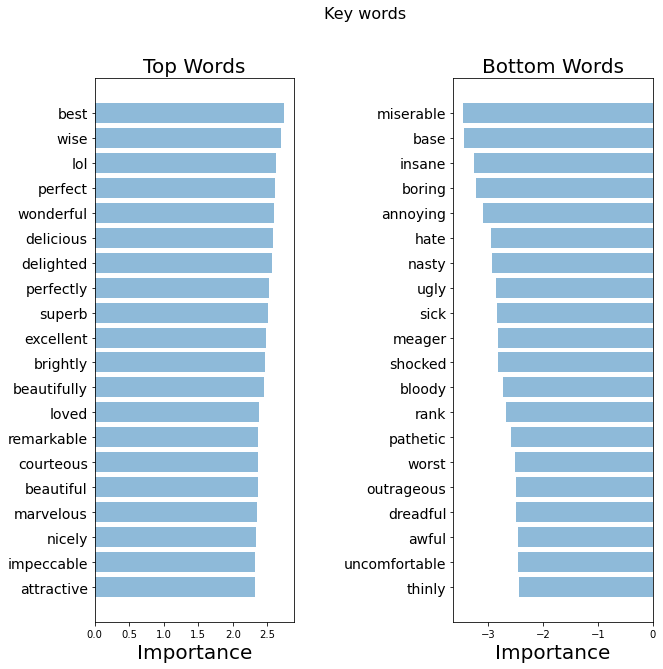

In [51]:
import matplotlib.pyplot as plt

def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Top Words', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Bottom Words', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Top and Bottom Words")

In [52]:
tfidvect = TfidfVectorizer(max_df=0.5)
lr_tokenize_test(tfidvect, X_train, y_train, X_test, y_test)

Training Accuracy:  0.9457774230558188
Accuracy:  0.9342170898388786
Precision:  0.9312379323144729
Recall:  0.9342170898388786
Confusion Matrix:  [[ 7983  3705]
 [ 1570 66930]]
AUC:  0.8300442527615822
